# Manipulation des donneés avec Pandas

# I. Preparation des données

Les données, dans la réalité, ne sont pas composées uniquement de chiffres et de nombres.

En effet, on retrouve aussi :

      -des catégories ;

      -des labels ;

      -des dates ;

      -du texte brut.

De plus, ces données ont généralement un format prédéfini en analyse de données, où chaque ligne va correspondre à un individu (au sens statistique du terme), et chaque colonne va être une caractéristique spécifique des individus. C’est ce que l’on appelle une variable.

### Fichier Excel

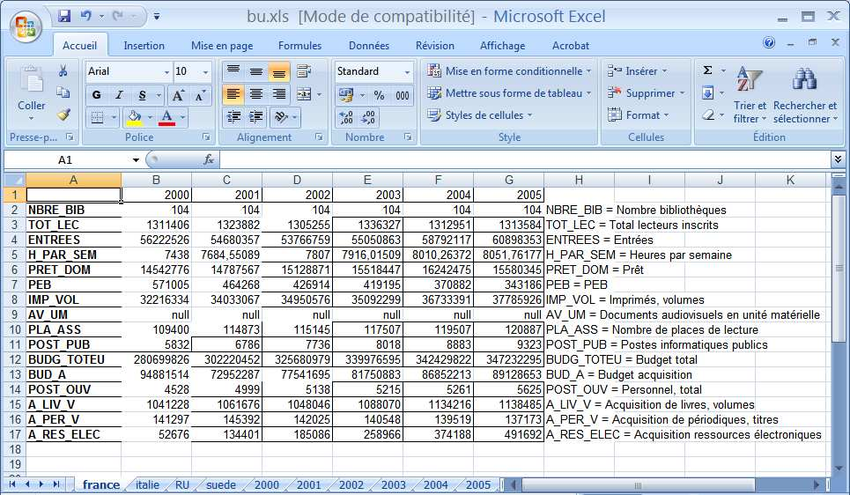

In [3]:
from IPython.display import Image
Image('Excel-file.png')

### Fichier csv

Il existe aussi des fichiers texte ou des fichiers **CSV (pour Comma-separated values)**. Ce sont simplement des fichiers contenant l’ensemble des données brutes, séparées par un délimiteur. 

In [ ]:
from IPython.display import Image
Image('sample-csv-file.png')

### Fichier JSON

Les données peuvent également être sous la forme d'un fichier **JSON (JavaScript Object Notation)**.
C'est un format standard utilisé pour représenter des données structurées. Cela ressemble à un gros dictionnaire Python pouvant contenir lui-même d’autres dictionnaires et/ou listes. 

In [ ]:
from IPython.display import Image
Image('JSON-file.png')

#### Remarque: 

- Nous nous intéressons ici aux formats **texte, JSON et CSV**, mais la liste n’est naturellement pas exhaustive. 
-  Plutôt que de stocker les données dans des fichiers, on a plutôt l’habitude de le faire dans des bases de données **SQL**

# II. Module pandas

Permet de 
- représenter les données avec le format souhaité (individus/variables)
- manipuler différents types de données, 
- et lire les données provenant de différentes sources. 

## III. DataFrame

- C'est un objet Python permettant de représenter les données sous forme de tableau, où chaque colonne est explicitement nommée. 
- Il reprend les mêmes paradigmes que l’**array NumPy** : chaque colonne peut naturellement être d’un type différent, mais une colonne ne peut contenir qu’un seul type 
- Cette organisation simplifie l’accès aux variables, et permet de nombreuses manipulations de données plus ou moins complexes.

### 1. Creation de dataFrame 

*  **A partir d'un fichier .CSV**

In [ ]:
#importer le module pandas et lire les données à partir du fichier csv 
import pandas as pd
Clients = pd.read_csv("clients.csv")
Clients.head()   # afficher seulement les 5 premières lignes 


* **A partir d'un fichier .JSON**

In [ ]:
#lire les données d'un fichier .json
data_json = pd.read_json("clients.json")
data_json.head()   # afficher seulement les 5 premiers lignes 

*  **A partir d'un fichier .XLSX**

In [ ]:
#lire les données d'un fichier excel
data_excel = pd.read_excel('clients.xlsx')
data_excel.head()   # afficher seulement les 5 premiers lignes 

### 2. Affichage du dataFrame

-  la **méthode  .head()**  affichent par défaut les **5 premières lignes du data frame**. 

-  la **méthode  .tail()**  permettant de sélectionner par défaut les **5 dernières lignes du data frame**. 

**Note:** Il est également possible de préciser entre parenthèses le nombre de lignes à afficher.

In [ ]:
# afficher les 5 premières lignes
display(Clients.head()) 
# on peut aussi afficher sans utiliser la fonction display

In [ ]:
# afficher les 2 dernières lignes
Clients.tail(2)

In [ ]:
# afficher les 5 premières et dernières lignes
display(Clients)

### 3. Cractèristiques d'un dataFrame

* **Dimensions d'un dataFrame**

Combien de lignes comportent un data frame ? Et combien de colonnes ? 
Il est possible de répondre à ces questions via la methode  **.shape** 

In [2]:
dim = Clients.shape
print(f"le nombre de lignes: {dim[0]}")
print(f"le nombre de colonnes: {dim[1]}")

NameError: name 'Clients' is not defined

* **Types de variables** 

Pour connaitre les types des variables du dataFrame, on utilise la methode **.dtypes** ou **info()**

In [ ]:
Clients.dtypes

In [ ]:
Clients.info()

**Remarque** on peut transformer notre data frame en un array

In [ ]:
clients_array=Clients.values
display(clients_array)

### 4. Manipulation du dataFrame

#### 1. Accès à une colonne 

Pour accéder à une colonne d’un data frame, il suffit d’utiliser la syntaxe suivant :  **nom_dataframe['nom_colonne']** ou bien **nom_dataframe.nom_colonne**.

In [ ]:
email=Clients['email']
print(f"la liste des email des clients est:\n {email}")

In [ ]:
Clients.genre

- Il est également possible d'afficher plusieurs colonnes à la fois

In [ ]:
variables=['nom','email']
data=Clients[variables]
print(f"la liste des nom et des email des clients est:\n {data}")

**Remarque** on peut afficher des variables en utilisant le nom de dataFrame et les noms des variables entre double crochets

In [ ]:
Clients[['nom','email']]

#### 2. Series de Pandas

Chaque colonne du dataFrame est de type **Series**. Ceci peut être vérifié via la fonction **type** :

In [ ]:
type(Clients['email'])

**Remarques**  
- Une Serie ne peut contenir qu’un seul type, alors qu’un dataFrame, qui est finalement une collection de Series, peut contenir des colonnes de types différents.
- Un dataFrame a 2 dimensions avec plusieurs colonnes, alors que la Series n’a qu’une seule dimension. Cela peut fortement vous aider lorsque vous utiliserez certaines méthodes, car vous pourrez savoir à quel type d’objet vous faites face, en vous basant sur l’affichage que vous avez de ce dernier.

In [ ]:
#affichage d'une serie
Clients['email']

#### 3. Manipuler les colonnes

Une colonne dans un dataFrame peut être:

 - créée ou supprimée ;

 - renommée ;

 - changée (de type) ;

 - utilisée pour trier un data frame (par une ou plusieurs colonnes).

##### a. Modifier une colonne existante

Avec Pandas on peut modifier le contenu des colonnes existantes dans le dataFrame

In [ ]:
# remplacer la valeur de la colonne par une valeur fixe en modifiant le type de la colonne 
Clients['nom']=1
Clients['nom']

On peut également remplacer une colonne par un objet de même dimension, soit une liste, un array ou une series comprenant le même nombre d'éléments.

 - **Exemple** 

In [ ]:
# modifier la colonne identifiant par elle-même multipliée par 100
Clients['identifiant'] = Clients['identifiant']*100
Clients['identifiant']

In [ ]:
# modifier la colonne identifiant par des valeurs aléatoires entre 1 et 1000
import numpy as np
Clients['identifiant'] = np.random.randint(1, 1000, Clients.shape[0])
Clients['identifiant'] 

In [ ]:
#modifier une colonne à base d'une fonction
#Soit la fonction suivante:
def cube(x):
    return x**3

# appel à la fonction à une colonne
Clients['identifiant'] = Clients['identifiant'].apply(cube)
Clients.identifiant

##### b. Créer et supprimer  une colonne 

###### Création

In [ ]:
#téléchargeons de nouveau notre dataFrame 
Clients = pd.read_csv("clients.csv")

In [ ]:
# Créez une colonne id à partir d'une colonne existante 
Clients['id']=Clients['identifiant']+1000
Clients.head()

Pour résumer, que ce soit pour modifier ou créer une colonne **col** , la syntaxe sera :  **mon_dataframe['col'] = x**  où x représente :
- une valeur fixe, 
- un objet de même dimension que la colonne qu’on souhaite modifier/créer, 
- un appel à une fonction sur la colonne à modifier (ou tout autre colonne de même type).

###### Suppression

Utiliser **drop**

In [ ]:
# Supprimer une colonne par la methode .drop
Clients=Clients.drop(columns='id')
Clients.head()

Utiliser **del**

In [ ]:
# Supprimer une colonne par le mot clé del
del Clients['identifiant']
Clients.head()

Utiliser **pop**

In [ ]:
#Supprimer une colonne par la mathode .pop
Clients.pop("email")
Clients.head()

##### c. Renommer une colonne

 La méthode pour renommer une colonne est **.rename** . On peut ainsi renommer une ou plusieurs colonnes via la syntaxe    
     **mon_dataframe.rename(columns={'ancien nom': 'nouveau nom'})**.

In [ ]:
#renommer la colonne "identifiant" en "ide"
Clients.rename(columns={'identifiant':'ide'})

In [ ]:
#renommer plusieurs colonne à la fois
Clients.rename(columns={'email':'mail', 'genre':'gen'})

### Remarque: 

 la méthode **rename** ne modifie pas le dataFrame existant. Il existe cependant un argument pour cette méthode (et pour toutes les méthodes similaires) nommé  **inplace** , qu’il suffit de fixer à **Vrai (True )** pour pallier cela. 
              
Ainsi,  **clients.rename(columns={'identifiant': 'ide'}, inplace=True)** est strictement équivalent à  **clients = clients.rename(columns={'identifiant': 'ide'})** .

In [ ]:
#rennomer plusieurs colonne à la fois avec changement dans le data frame existant
#téléchargeons de nouveau notre dataFrame 
Clients = pd.read_csv("clients.csv")
Clients.rename(columns={'identifiant':'ide','email':'mail','genre':'gen'}, inplace=True)
Clients.head()

##### d. Changer le type d'une colonne

La  méthode **.astype** permet de changer le type d’une colonne. 

In [ ]:
Clients['ide'].astype(float)

##### e. Trier un dataFrame

En analyse de données, on a régulièrement besoin de trier des données selon une ou plusieurs colonnes. La méthode **sort_values** réalise cette action très aisément. Il suffit de préciser entre parenthèses la ou les colonnes selon lesquelles il faut trier. 

In [ ]:
# trier selon l’identifiant, par ordre croissant :
Clients.sort_values('ide')

In [ ]:
#trier selon l’identifiant par ordre décroissant :
Clients.sort_values('ide', ascending = False)
# Le mot clé ascending permet de définir si on souhaite trier par ordre croissant ou décroissant.

In [ ]:
# trier selon le genre puis le nom, par ordre croissant :
Clients.sort_values(['gen', 'nom'])

In [ ]:
# trier par genre en ordre croissant et par nom en ordre décroissant :
Clients.sort_values(['gen','nom'],ascending=[True,False])

### 5. Application 

Nous allons travailler sur le fichier de prêts immobiliers.

 Chaque ligne correspond à un prêt qui a été accordé à un de nos clients. Chaque client est identifié par son identifiant. Nous avons les informations suivantes :

 - la ville et le code postal de l’agence où le client a contracté le prêt ;

 - le revenu mensuel du client ;

 - les mensualités remboursées par le client ;

 - la durée du prêt contracté, en nombre de mois ;

 - le type de prêt ;

 - le taux d’intérêt.

l'objectif de l'application va être de modifier ce jeu de données pour calculer différentes variables nécessaires pour identifier les clients qui sont à la limite de leur capacité de remboursement et déterminer les bénéfices réalisées par la banque.

##### Travail demandé:
1. Importez les modules nécessaires
2. Créez le dataFrame nécessaire lié au fichier source
3. Créez une nouvelle variable calculant le taux d'endettement de chaque individu. Ce taux correspond au pourcentage du revenu remboursé chaque mois par un individu. Vous arrondirez le résultat à 2 chiffres après la virgule.
4. Renommez la variable taux à taux_interet 
5. réez deux autres variables : 
- `cout_total` correspondant au coût total du prêt à partir du 
   *remboursement* et de la *duree*
- `benefices` correspondant aux **bénéfices mensuels** réalisés par la banque sur le prêt

 Le calcul des bénéfices est representé par : 

bénéfices = $\dfrac{C * T}{24} $

avec :
- C = coût total du prêt
- T = taux d'intérêt
6. Affichez les 5 prêts avec les bénéfices les plus élevés

In [ ]:
# Importation des bibliothèques
import numpy as np
import pandas as pd 
# Création de dataFrame
prets=pd.read_csv("prets.csv")
prets.head()


In [ ]:
# Créez une nouvelle variable calculant le taux d'endettement de chaque individu
prets['taux_endettement']= round(prets['remboursement']*100/prets['revenu'],2)
prets.head()

In [ ]:
# Renommez la variable taux en taux_interet :
prets.rename(columns = {'taux':'taux_interet'},inplace=True )
prets.head()

In [ ]:
prets['cout_total'] = prets['remboursement']*prets['duree']
prets['benefices'] = round((prets['cout_total']*prets['taux_interet']/100)/24,2)
prets.head()

In [ ]:
#les 5 prets avec les benifices le plus elvé
prets.sort_values('benefices',ascending=False).head()

# IV. Filtrage des données du dataFrame 

Pandas offre des opérations de **restriction/ filtrage** sur le dataFrame  afin de réaliser une manipulation spécifique sur les données 

## 1. Sélection via des indices 

Pour une selection via des indices on utilise la méthode **.iloc** : 

**Nom_dataframe.iloc[indice_ligne, indice_colonne]**

 - **Exemples:** 

In [ ]:
#telecharger de nouveau notre data frame 
Clients = pd.read_csv("clients.csv")
Clients

In [ ]:
# sélectionner l'email du premier client de notre dataframe Clients:
Clients.iloc[0,1]

In [ ]:
# sélectionner le nom des 10 premiers clients :
Clients.iloc[:10, 2]

In [ ]:
# sélectionner le genre des 10 premiers clients :
Clients.iloc[:10, 3]

In [ ]:
# sélectionner toutes les colonnes des 10 premiers clients :
Clients.iloc[:10, :]

In [ ]:
# sélectionner l’email et le nom des 10 clients suivants :
Clients.iloc[10:20, 1:3]

In [ ]:
# sélectionner l’e-mail et le genre des 10 derniers clients :
Clients.iloc[-10:, [1, 3]]

## 2. Sélection via des conditions

les data frames possèdent de nombreuses méthodes. La plus utilisée est la métode **.loc** dont le syntaxe est le suivant:


**nom_dataframe.loc[condition_sur_les_lignes, colonne(s)]**

In [ ]:
# Création du dataFrame
prets=pd.read_csv("prets1.csv")
prets.head()

In [ ]:
# Sélectionner les prets de type automobile
prets.loc[prets['type']=='automobile', :]

In [ ]:
# Sélectionner les identifiants des personnes qui ont des prets de type automobile
prets.loc[prets['type']=='automobile', 'identifiant']

In [ ]:
# Sélectionner les identifiants et les revenus des personnes qui ont des prets de type automobile
prets.loc[prets['type']=='automobile', ['identifiant', 'revenu']]

In [ ]:
# Sélectionner les personnes qui ont des revenus > 4000
prets.loc[prets['revenu']>4000, :]

In [ ]:
# Sélectionner les personnes qui ont des revenus > 4000 et ont un pret automobile 
prets.loc[(prets['revenu']>4000) & (prets['type']=='automobile'), :]

In [ ]:
# Sélectionner les personnes qui ont soit  des revenus > 4000 soit un pret automobile 
prets.loc[(prets['revenu']>4000) | (prets['type']=='automobile'), :]

**Remarque:**  Une autre option de la méthode **.loc** est la sélection par **index**. 
Il y a une différence entre des index et des indices. 
- Les indices, comme nous l’avons vu plus haut, sont les positions intrinsèques d’un élément au sein d’un tableau. 
- Les index, en revanche, correspondent à une valeur qui est associée à chaque ligne. C’est ce que vous voyez sur la gauche de votre data frame 

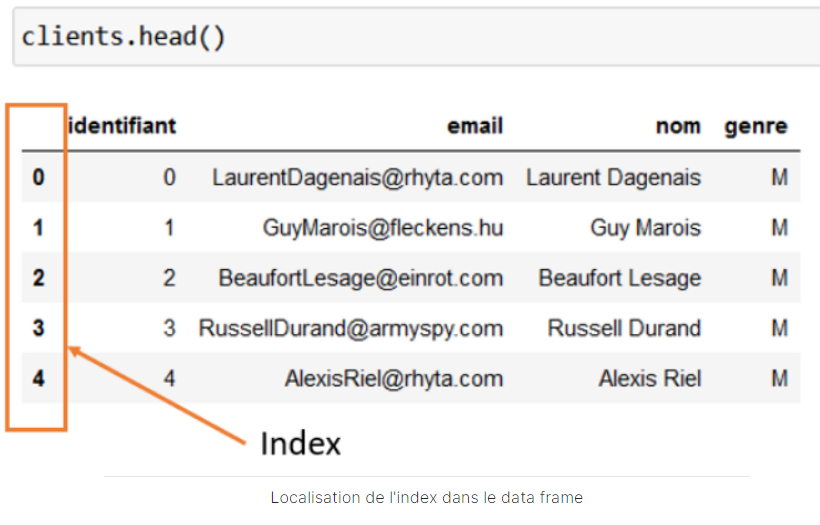

**Remarque:** par défaut, les index correspondent aux indices ! Mais ils peuvent ne pas être numériques ; on pourrait par exemple fixer le nom de la personne comme index, si on est sûr qu'il n'y aura pas de doublons.

Faisons un simple tri pour bien comprendre la différence entre l’indice et l’index :

In [ ]:
Clients.sort_values('nom').head()

In [ ]:
# Sélection selon les index avec la méthode .loc
display(Clients.loc[0:10, :])
# Sélection selon les indices avec la méthode .iloc
display(Clients.iloc[0:10, :])

In [ ]:
# Liste des index d'un data frame
Clients.index

In [ ]:
# Création d’un dataFrame trié pour ‘désordonner’ les Index
df_temp = Clients.sort_values('nom')
display(df_temp)

In [ ]:
# Changer les index :
display(df_temp.reset_index())

In [ ]:
# reset_index sans garder les anciens Index :
display(df_temp.reset_index(drop=True))

## 3. Modification d'une selection

comme avec les colonnes, on peut utiliser les méthodes **.iloc**  ou  **.loc** pour modifier un dataFrame existant. Il est possible aussi de modifier précisément une partie d’un dataFrame. 

 - **Exemple**: En souhaitant  accorder une remise au trois premiers clients  en baissant leurs taux à 1.05%

In [ ]:
prets

In [ ]:
# Accéder au taux des 3 premiers clients et le modifier à 1.05
prets.iloc[:3,7]=1.05
prets.head()

In [ ]:
# accorder ce taux 1.05% aux personnes qui ont un prets de l'agence parisienne
prets.loc[prets['ville']=='PARIS', 'taux']=1.05
prets.head(10)

In [ ]:
# Augmenter le taux des personnes qui ont un prets à Marseille de 0.5%
mask=prets['ville']=='MARSEILLE'
prets.loc[mask, 'taux']=prets.loc[mask, 'taux']+ 0.5
prets.head(10)

### Application 

Nous allons manipuler les demandes des prêts bancaires. 
Les demandes suivantes ont été formulées par le responsable du service prêt de la banque:
 - Le taux d’endettement autorisé est de 35%. Pourriez vous me communiquer le nombre de personnes ayant dépassé ce seuil ?
 - Même question, mais uniquement sur l’agence Parisienne. 
  
  Pour faciliter le traitement d’éventuelles futures demandes de prêts, pourriez vous ajouter une variable nommée *risque* qui nous permettrait d’identifier les clients risqués facilement
 - Combien de prêts automobiles ont été accordés ? Quel est le coût total moyen de ces derniers ?
- Quel est le bénéfice mensuel total réalisé par l’agence Toulousaine ?


**Correction**

In [ ]:
#Le taux d’endettement autorisé est de 35%. Pourriez vous me communiquer le nombre de personnes ayant dépassé ce seuil ?
nb_clients_risque=prets.loc[prets['taux']>3.5, :].shape[0] #shape est utilisé pour calculer le nombre
print(f"il existe {nb_clients_risque} clients à risque")

In [ ]:
# Même question, mais uniquement sur l’agence Parisienne 
nb_clients_risque_p=prets.loc[(prets['taux']>3.5) & (prets['ville']=='PARIS'), :].shape[0] #shape est utilisé pour calculer le nombre
print(f"il existe {nb_clients_risque_p} clients a risque à l'agence parisienne")

In [ ]:
# Variable nommée risque a pour valeur "oui" si le client a risque "non" sinon
prets['risque']='Non'
prets.loc[prets['taux']>3.5, 'risque']='Oui'

In [ ]:
# Combien de prêts automobiles ont été accordés ? Quel est le coût total moyen de ces derniers ?
prets_auto=prets.loc[prets['type']=="automobile",:]
print("le nombre des prets automobiles est: ", prets_auto.shape[0])
prets_auto['CP'].mean()

In [ ]:
#Quel est le bénéfice mensuel total réalisé par l’agence Toulousaine ?
prets.loc[prets['ville']=='TOULOUSE','revenu'].sum()

# V. Agrégation des données

L'agrégation est une opération très courante sur des data frames, soit pour analyser les données sous un certain angle, soit pour recalculer certaines variables, comme la moyenne des mensualités par agence. 

## 1. Agrégation de plusieurs lignes


La première méthode est **.group_by** . Pour l’utiliser, vous aurez besoin de vous fixer sur une ou plusieurs colonnes, qui seront ce qu’on appelle les index de votre résultat agrégé. Puis choisir la fonction d'agrégation qui va prendre en entrée un groupe de plusieurs lignes, pour effectuer un calcul sur celles-ci et *retourner une unique valeur* pour chacun des groupes. 

In [ ]:
# Calculer les chiffres d'affaires total de chaque agence de notre data frame "prets"
chiffre_affaire=prets.groupby('ville')['revenu'].sum()
chiffre_affaire

In [ ]:
# Nous ne souhaitions avoir la même information que par agence ET par type de prêt.
prets.groupby(['ville','type'])['revenu'].sum()

In [ ]:
# nous souhaitons avoir le résultat sur la variable remboursement :
prets.groupby(['ville','type'])['remboursement'].sum()

 **Remarque**
On peut appliquer des fonctions d’agrégation différentes en fonction de la colonne, voire appliquer plusieurs fonctions d’agrégation sur une même colonne. par exemple on calcule la moyenne et la somme des remboursements par agence, ainsi que le maximum des revenus 

In [ ]:
prets.groupby('ville').agg({'remboursement':['sum','mean'], 'revenu':'max'})

## 2. Agrégation des lignes et des colonnes

On  souhaite  avoir la même agrégation, mais avec cette fois-ci, en lignes nos agences, et en colonnes les différents types de prêts.

La méthode qui permet de  faire cela est la méthode **.pivot_table**. Celle-ci prend 4 arguments en paramètres :

 **index** : variable(s) placée(s) en ligne ;

 **columns** : variable(s) placée en colonne(s) ;

 **values** : variable sur laquelle on va appliquer la fonction d’agrégation ;

 **aggfunc** : fonction d’agrégation.

La méthode permettant la transformation inverse s’appelle **melt** .

In [ ]:
# calculer le chiffre d'affaires dégagé par chacune des agences en fonction de type de prets
prets.groupby(['ville','type'])['revenu'].sum()

In [ ]:
# un tableau à deux entrées
data=prets.pivot_table(index='ville', columns='type', values='remboursement',aggfunc='sum')
data

In [ ]:
data=data.reset_index()
data

In [ ]:
#la fonction melt joue le role inverse de la fonction pivot 
data.melt(id_vars='ville', value_vars=['automobile', 'immobilier'])

## 3. Application 
Suite aux résultats précédents, le responsable du service Prêts revient vous voir avec une remarque : certains clients ont contracté plusieurs prêts au sein de l'agence. Cela fausse donc potentiellement les calculs réalisés précédemment.

Il formule donc des demandes additionnelles, auxquelles vous allez devoir répondre en appliquant diverses agrégations.

1. Pourriez vous créez un dataframe profil client pour pallier à ce problème ?

Par profil client, nous entendons un dataframe où il y n'y a qu'une seule ligne par client, avec le résumé de ses informations (somme remboursement, du taux d'endettement, du cout_total et des bénéfices réalisés)

2. Recalculez le nombre exact de personnes en situation bancaire risquée à partir du taux d'endettemment
3. Calculez le bénéfice dégagé par chacune de nos agences, par types de prêts. Vous présenterez vos résultats sous la forme d'un tableau simple
4. on souhaite avoir un tableau à double entrée (via un pivot_table) présentant cette fois ci les bénéfices moyen réalisés par chaque agence, pour chaque type de prêt 
5. Quelle ville semble la plus intéressante où développer les prêts immobiliers ?

**CORRECTION**

In [ ]:
#Pourriez vous créez un dataframe profil client pour pallier ce problème ?
profil_clients = prets.groupby('identifiant')[['remboursement','taux','CP','revenu']].sum()
profil_clients.reset_index(inplace=True)
profil_clients.head()

In [ ]:
profil_clients.shape

In [ ]:
# Recalculez le nombre exact de personnes en situation bancaire risquée à partir du taux d'endettemment :
nombre_client_risque = profil_clients.loc[profil_clients['taux'] > 3.5, :].shape[0]
print('Il y a', nombre_client_risque, 'clients qui ont dépassé le seuil autorisé')

In [ ]:
# Calculez le bénéfice dégagé par chacune de nos agences, par types de prêts. Vous présenterez vos résultats sous la forme d'un tableau simple
prets.groupby(['ville','type'])['revenu'].sum()

In [ ]:
# on souhaite avoir un tableau à double entrée (via un pivot_table) présentant cette fois-ci les bénéfices moyen réalisés par chaque agence, pour chaque type de prêt 
prets.pivot_table(index='ville', columns='type', values='revenu', aggfunc=np.mean)

# VI. Fusion des données avec Pandas

Les sources de données peuvent être multiples comme:

  - les informations issues de la navigation des clients sur le site web ;
  - les données récoltées via une application mobile ;
  - les données issues des différents services (Professionnels, Investissement) ;
  - etc.  
  
  Pour chaque source de données, on peut avoir un ou plusieurs fichiers de données, donc plusieurs data frame.
  Il est necessaire de faire une **jointure** entre les différents jeux de données afin de réaliser une analyse de données.

  Pour effectuer une jointure, nous avons besoin d’une information commune dans chaque jeu de données :  **une clé**. La clé est formée d’une ou plusieurs colonnes qui existent dans chaque jeu de données.


## 1. Méthode/fonction de jointure

Il existe deux façons pour faire une jointure entre deux dataFrames  **A** et **B**  avec Pandas en utilisant la méthode ou la fonction **merge()** : 

- via la fonction Pandas:  **pd.merge(A, B)** ;

- via la méthode de dataFrame:  **A.merge(B)**  .

#### Remarques

- Lorsque on ne précise pas la clé, pandas cherche les colonnes en commun dans les différents dataFrames (celles qui portent le même nom) et va les sélectionner comme clés : c’est ce qu’on appelle **une jointure naturelle**.  
  
- lorsqu'on va préciser la clé il existe deux cas possible:
 
   **1.** lorsque la clé porte le même nom dans chaque dataFrame, on peut utiliser l’argument **on** ; 
   
   **2.** lorsque la clé n’a pas le même nom, il est nécessaire de préciser quelle clé on va utiliser dans chaque dataFrame. On aura alors besoin des arguments **right_on**  et  **left_on** qui correspondront à la clé dans le dataFrame à droite et celle dans le dataFrame à gauche. 

#### Exemples: 

**jointure entre 2 dataframes A et B**

pd.merge(A, B, on='identifiant')

**jointure entre 2 dataframes A et C**

C.merge(A, left_on='id', right_on='identifiant')

**jointure entre 2 dataframes A et B**

pd.merge(A, B, left_on='identifiant', right_on='id')

##### Exemple pratique

In [ ]:
import pandas as pd 
#creation de data frame prets 
prets=pd.read_csv("https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets.csv")
# chargement du  data frame clients
Clients = pd.read_csv("clients.csv")
data = pd.merge(Clients, prets, on='identifiant')
display(data)

## 2. Types de jointure

Le type de jointure va déterminer comment Pandas doit traiter les différentes clés de nos dataFrames, surtout lorqu'on ne trouve pas la même clé dans les différents dataFrames.

Il existe 4 types de jointures, qui sont toutes focalisées sur les différentes clés :

  - interne ;
  - à gauche ;
  - à droite ;
  - externe.

Soient les deux data frames suivants: **taille** et **poids** dans lesquels nous avons la taille et le poids de certains individus :

In [ ]:
Idstaille = [1,2,3]
tailles = [1.80, 1.70, 1.75]
df_taille = pd.DataFrame(list(zip(Idstaille, tailles)), 
                         columns=["id", "Taille"])

In [ ]:
Idstaille = [1,3,5]
tailles = [80, 75, 70]
df_poids = pd.DataFrame(list(zip(Idstaille, tailles)), 
                        columns=["id", "Poids"])

**1. La jointure interne** (ou **inner join**) est le type de jointure par défaut.  Avec une jointure interne, ne sont conservées dans le résultat final que les lignes dont les clés sont dans le premier data frame ET dans le second data frame. 

In [ ]:
pd.merge(df_taille, df_poids, on = 'id', how = 'inner')

 **2. La jointure à gauche (ou left join)** est une jointure qui se concentre sur les identifiants de la table située à gauche (ici, taille).C'est-à-dire qu’elle conserve forcément toutes les clés qui se trouvent dans la première table, et complète, lorsqu’elle le peut, avec les informations de la seconde table.


In [ ]:
pd.merge(df_taille, df_poids, on = 'id', how = 'left')

- Remarque: lorsqu'il n'y a pas de correspondance on termine par **NaN (Note a Number)** ce qu'on appelle **la valeur manquante** 

**3.  La jointure à droite (ou right join)** eest une jointure qui se concentre sur les identifiants de la table située à droite (ici, poids).C'est-à-dire qu’elle conserve forcément toutes les clés qui se trouvent dans la première table, et complète, lorsqu’elle le peut, avec les informations de la seconde table.


In [ ]:
pd.merge(df_taille, df_poids, on = 'id', how = 'right')

**4. la jointure externe (ou outer join)** est une sorte de conjonction des jointures à gauche et à droite. C’est-à-dire qu’on conserve TOUTES les clés trouvées, que ce soit à gauche ou à droite, et on bouche les informations manquantes par des valeurs manquantes.


In [ ]:
pd.merge(df_taille, df_poids, on = 'id', how = 'outer')

## 3. Concaténation des données avec Pandas

La concaténation intervient lorsqu’on souhaite assembler plusieurs dataFrames qui ont la même structure, les mêmes colonnes, les mêmes types, mais des informations différentes. Le cas typique correspond à des exports de données mensuelles, où on aurait les mêmes variables d’un mois à l’autre.

La fonction Pandas permettant de faire une concaténation est la fonction  **concat** . Pour concaténer plusieurs data frames, il suffit de placer l’ensemble de ceux-ci dans une liste, et d’utiliser la fonction **concat** sur cette liste.

**liste_concat = [df1, df2]**

**pd.concat(liste_concat)**

**Reamrque:** 
  La concaténation ne gère pas les index par défaut. L’opération met juste le second dataFrame à la suite du premier, sans appliquer la moindre modification. Ainsi, on aura des index en doublon, ce qui peut être problématique.
  Pour éviter cela, on peut utiliser l’argument
   
  **ignore_index :  pd.concat([df1, df2], ignore_index=True)**

## 4. Application 

Soit le fichier contenant des informations de prêts, et deux autres fichiers contenant les informations des clients (clients1, clients2).
l'objectif de l'application est de rassembler ces différents fichiers en un seul pour faciliter les traitements et l'anlyse de données.

##### Travail demandé: 

1. Créer les dataFrames de trois fichiers 
2. Rassembler les deux dataframes clients_1 et clients_2 en un gros dataframe clients qui contiendra l'ensemble des informations de notre clientèle ! 
3. Fusionner le fichier clients avec les profils clients créés précédemment. Vous pouvez nommer le dataframe final **data**
4. Le service marketing de la banque nous a fourni un fichier dans lequel se trouve l'age de TOUS les clients de notre banque. Ajoutez l'information de l'âge au dataFrame data

**CORRECTION**

In [ ]:
#data frame clients1
clients1=pd.read_csv("clients1.csv")
clients1.head()

In [ ]:
#data frame clients2
clients2=pd.read_csv("clients2.csv")
clients2.head()

In [ ]:
 #Rassembler les deux dataframes clients_1 et clients_2 en un gros dataframe clients qui contiendra l'ensemble des informations de notre clientèle ! 
clients = pd.concat([clients1, clients2], ignore_index=True)

In [ ]:
#fusionner le fichier clients avec les profils clients créés précédemment. Vous pouvez nommer le dataframe final **data**
data = pd.merge(clients, profil_clients, on='identifiant', how='inner')
data.head()

In [ ]:
# Le service marketing de la banque nous a fourni un fichier dans lequel se trouve l'age de TOUS les clients de notre banque. 
#data frame age
clients_age = pd.read_csv('client_age.csv')
clients_age.head()

In [ ]:
#Ajoutez l'information de l'age au dataframe data
data = pd.merge(data, clients_age, on='identifiant', how='left')
data.head()